In [1]:
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from pandas.tseries.offsets import BDay
import calendar
import math

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import re
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as sm
from sklearn import linear_model

import datetime as dt
from datetime import datetime, date, timedelta

In [2]:
revenue = pd.read_excel("forecast - Frances.xlsx",  "Partner_S")
revenue.head()

,year,month,Partner_S,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Nov,Trend,Trend^2,covid,covid_hospitalization,covid_death,covid_test_positive,B_round_funding,C_round_funding,% of Sinclair
0,2014,October,298.0,0,0,0,0,0,0,0,...,0,1,1,0,0.0,0.0,0.0,0,0,0.022828
1,2014,November,670.0,0,0,0,0,0,0,0,...,1,2,4,0,0.0,0.0,0.0,0,0,0.047313
2,2014,December,447.0,0,0,0,0,0,0,0,...,0,3,9,0,0.0,0.0,0.0,0,0,0.013926
3,2015,January,812.0,1,0,0,0,0,0,0,...,0,4,16,0,0.0,0.0,0.0,0,0,0.030034
4,2015,February,1367.0,0,1,0,0,0,0,0,...,0,5,25,0,0.0,0.0,0.0,0,0,0.043810


In [3]:
revenue['year'].astype(int)
training = revenue[revenue['year'] <= 2020]
forecast = revenue[revenue['year'] == 2021]

### Estimation

In [4]:
result = sm.ols(formula = 'Partner_S ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Trend+covid+B_round_funding+C_round_funding', data = training).fit()
model = result.summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:              Partner_S   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     49.87
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           7.85e-28
Time:                        15:46:45   Log-Likelihood:                -918.75
No. Observations:                  75   AIC:                             1870.
Df Residuals:                      59   BIC:                             1907.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.771e+04    2.9e+04     

### OLS Regression Plot

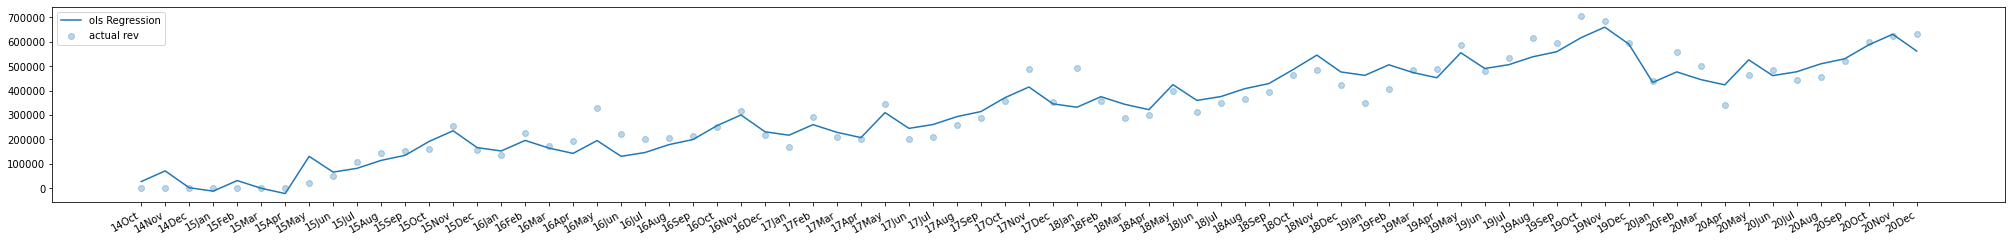

In [5]:
x = training['year'].astype(str).str[-2:] + training['month'].str[:3]
y_actual = training['Partner_S']
y_fitting = result.predict(training[training.columns[3:22]])

fig, ax = plt.subplots()
ax.scatter(x, y_actual, alpha=0.3, label = 'actual rev')
ax.plot(x, y_fitting, label = 'ols Regression')
ax.legend(loc='best')
fig.set_figwidth(35)
fig.autofmt_xdate()

### Annual Prediction

In [6]:
predict_2021 = result.predict(forecast[forecast.columns[3:22]])
predict_2021.head()

75    548053.975887
76    591397.142553
77    559830.642553
78    538146.309220
79    640812.809220
dtype: float64

### 2021 true data

In [7]:
actual_data = forecast['Partner_S']
actual_data.head()

75    449643.0
76    481234.0
77    569123.0
78    558567.0
79    616731.0
Name: Partner_S, dtype: float64

### Plot comparison

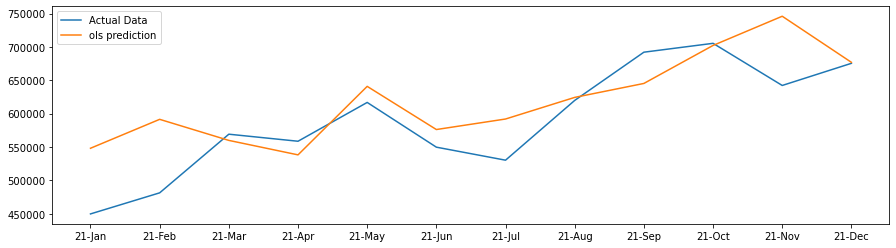

In [10]:
x_axis = forecast['year'].astype(str).str[-2:] + '-' + forecast['month'].str[:3]

fig, ax = plt.subplots()
ax.plot(x_axis, actual_data, label = 'Actual Data')
ax.plot(x_axis, predict_2021, label = 'ols prediction')
ax.legend(loc='best')
fig.set_figwidth(15)

### calculate % of error

In [9]:
mse = mean_squared_error(actual_data, predict_2021)
rmse = math.sqrt(mse)
percent_of_error = rmse/actual_data.mean()*100
print('percent_of_error:',percent_of_error,'%')

percent_of_error: 9.820884175733015 %
